In [ ]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Function to be learned - a line
### $$f(x) = \pi x + 10 $$

In [ ]:
# TO DO: implement f(x) - 1 line
def f(x):
  return np.pi*x + 10

In [ ]:
# TO DO: generate 100 data points in range of [-5,5] - 1 line
n = 100
x = np.linspace(-5,5, num=n)

In [ ]:
x = x.reshape(1, n)
x.shape

(1, 100)

In [ ]:
y = f(x)
y.shape

(1, 100)

## Our hypothesis
### $$\hat{y}(x)=wx+b$$

In [ ]:
# initialize weight and bias randomly - 2 lines
w = np.random.rand(1)
b = np.random.rand(1)

In [ ]:
w.shape

(1,)

In [ ]:
w = w.reshape(1,1)
b = b.reshape(1,1)

In [ ]:
w.shape

(1, 1)

In [ ]:
def y_hat(w, b, x):
  return w*x + b

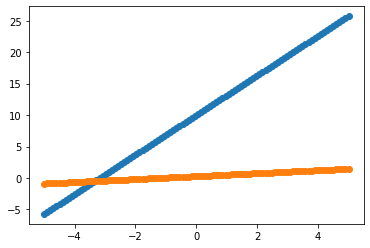

In [ ]:
plt.scatter(x, y)
plt.scatter(x, y_hat(w, b, x))
plt.show()

## Loss function - Mean Squared Error
### $$L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \big(y_i-\hat{y_i}\big)^2 $$

In [ ]:
# TO DO: implement mse - 1 to 2 lines
def mse(y, y_hat):
  return np.average((y - y_hat)**2)

## np.dot demo

In [ ]:
A = np.array([[1,2,3]])
B = A

In [ ]:
A.shape

(1, 3)

In [ ]:
np.dot(A, B.T)

array([[14]])

In [ ]:
B.T.shape

(3, 1)

In [ ]:
np.dot(A.T, B)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [ ]:
A*B

array([[1, 4, 9]])

## Gradients with respect to w, b
### $$ \frac{\partial L}{\partial w} = \frac{2}{n}\sum_{i=1}^{n}\big(\hat{y_i}-y_i\big)x_i$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{n}\sum_{i=1}^{n}\big(\hat{y_i}-y_i\big)$$


In [ ]:
def gradients(x, y, y_hat):
  n = y.shape[1]
  grads = {}

  # TO DO: add the gradients with respect to w,b to grads - 2 lines
  grads['dw'] = (2/n)*np.dot((y_hat-y), x.T)
  grads['db'] = 2*np.average(y_hat-y)

  return grads

## Training our model - update w, b accordingly
### $$w = w - \alpha \frac{\partial L}{\partial w}$$
### $$b = b - \alpha \frac{\partial L}{\partial b}$$


In [ ]:
def gradient_descent(x, y, learning_rate, w, b):
  # initialize params
  alpha = learning_rate
  losses = []

  # train model
  for i in range(100):
    # TO DO: get the predictions w, b, x using a function that we defined - 1 line
    predictions = y_hat(w, b, x)

    # TO DO: get the gradients using x, y, predictions using a function that we defined - 1 line
    grads = gradients(x, y, predictions)
    db = grads['db']
    dw = grads['dw']

    # TO DO: update w, b - 2 lines
    b -= alpha*db
    w -= alpha*dw

    # compute loss 
    loss = mse(y, predictions)
    losses.append(loss)

  return w, b, losses

In [ ]:
# TO DO: run linear regression gradient_descent function; set learning_rate = 0.03 - 1 line
w, b, losses = gradient_descent(x, y, 0.03, w, b)

In [ ]:
w

array([[3.14159265]])

In [ ]:
b

array([[9.98004668]])

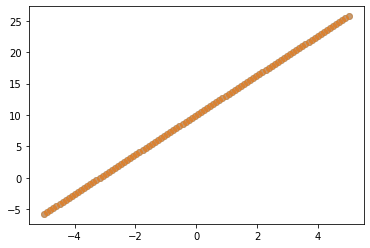

In [ ]:
plt.scatter(x, y, alpha=0.5)
plt.scatter(x, y_hat(w, b, x), alpha=0.5)
plt.show()

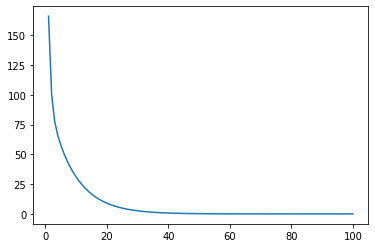

In [ ]:
plt.plot(range(1, len(losses)+1), losses)

## The effect of different learning rates

In [ ]:
w_small_alpha = 0
b_small_alpha = 0
w_large_alpha = 0
b_large_alpha = 0

In [ ]:
w_small_alpha, b_small_alpha, losses_small_alpha = gradient_descent(x, y, 0.01, w_small_alpha, b_small_alpha)
w_large_alpha, b_large_alpha, losses_large_alpha = gradient_descent(x, y, 0.1, w_large_alpha, b_large_alpha)

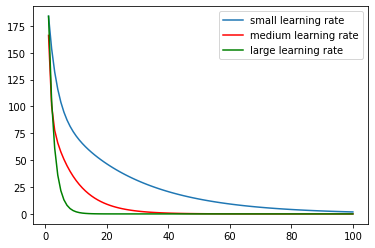

In [ ]:
plt.plot(range(1, len(losses)+1), losses_small_alpha, label='small learning rate')
plt.plot(range(1, len(losses)+1), losses, label='medium learning rate', color='r')
plt.plot(range(1, len(losses)+1), losses_large_alpha, label='large learning rate', color='g')
plt.legend()

# Note: A large learning rate could cause the loss to diverge to infinity.

In [ ]:
w_large_alpha = 0
b_large_alpha = 0

In [ ]:
w_large_alpha, b_large_alpha, losses_large_alpha = gradient_descent(x, y, 0.5, w_large_alpha, b_large_alpha)

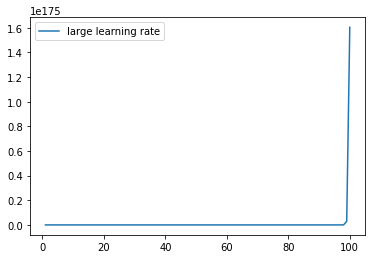

In [ ]:
plt.plot(range(1, len(losses)+1), losses_large_alpha, label='large learning rate')
plt.legend()

# SAT vs GPA

In [ ]:
url = "https://raw.githubusercontent.com/uclaacmai/beginner-track-fall-2020/main/Workshop_8/sat_vs_gpa.csv"
data = pd.read_csv(url)
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
sat = np.array(data['SAT'])
gpa = np.array(data['GPA'])
sat

array([1714, 1664, 1760, 1685, 1693, 1670, 1764, 1764, 1792, 1850, 1735,
       1775, 1735, 1712, 1773, 1872, 1755, 1674, 1842, 1786, 1761, 1722,
       1663, 1687, 1974, 1826, 1787, 1821, 2020, 1794, 1769, 1934, 1775,
       1855, 1880, 1849, 1808, 1954, 1777, 1831, 1865, 1850, 1966, 1702,
       1990, 1925, 1824, 1956, 1857, 1979, 1802, 1855, 1907, 1634, 1879,
       1887, 1730, 1953, 1781, 1891, 1964, 1808, 1893, 2041, 1893, 1832,
       1850, 1934, 1861, 1931, 1933, 1778, 1975, 1934, 2021, 2015, 1997,
       2020, 1843, 1936, 1810, 1987, 1962, 2050])

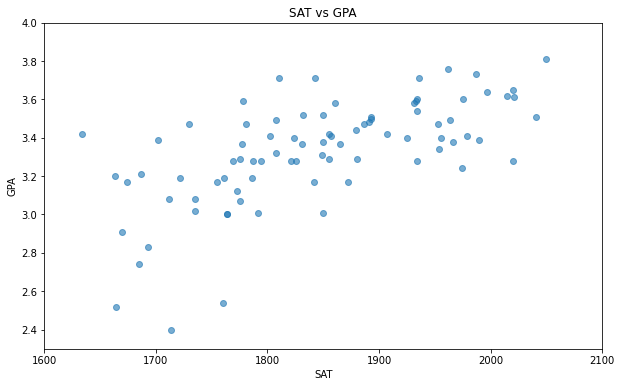

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(sat, gpa, alpha=0.6)
plt.title("SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.xlim(1600, 2100)
plt.ylim(2.3, 4)
plt.show()

In [ ]:
n = sat.shape[0]
n

84

In [ ]:
x = sat.reshape(1, n)
y = gpa.reshape(1, n)
x

array([[1714, 1664, 1760, 1685, 1693, 1670, 1764, 1764, 1792, 1850, 1735,
        1775, 1735, 1712, 1773, 1872, 1755, 1674, 1842, 1786, 1761, 1722,
        1663, 1687, 1974, 1826, 1787, 1821, 2020, 1794, 1769, 1934, 1775,
        1855, 1880, 1849, 1808, 1954, 1777, 1831, 1865, 1850, 1966, 1702,
        1990, 1925, 1824, 1956, 1857, 1979, 1802, 1855, 1907, 1634, 1879,
        1887, 1730, 1953, 1781, 1891, 1964, 1808, 1893, 2041, 1893, 1832,
        1850, 1934, 1861, 1931, 1933, 1778, 1975, 1934, 2021, 2015, 1997,
        2020, 1843, 1936, 1810, 1987, 1962, 2050]])

In [ ]:
w = np.random.rand(1,1)
b = np.random.rand(1,1)
w

array([[0.96131433]])

In [ ]:
w, b, losses = gradient_descent(x, y, 0.00000005, w, b)
w

array([[0.0016832]])

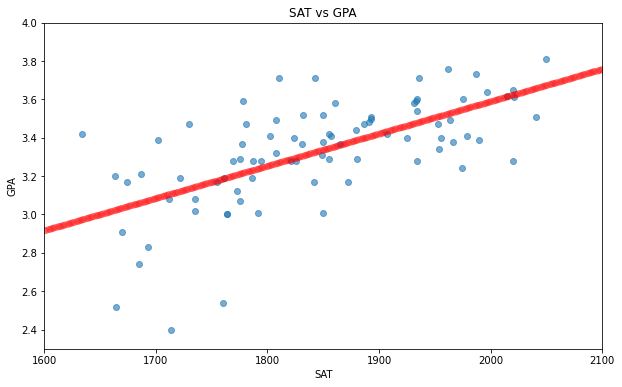

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(sat, gpa, alpha=0.6)
plt.title("SAT vs GPA")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.xlim(1600, 2100)
plt.ylim(2.3, 4)

x = np.linspace(1600, 2100, num=500)
y = y_hat(w, b, x)
plt.scatter(x, y, color="r", alpha=0.2)
plt.show()
